In [2]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler
import joblib

In [3]:
# Load the dataset
df = pd.read_csv('water_quality_dataset.csv')

In [4]:
# Display the first few rows of the dataset
df.head()

,tds,turbidity,pH,mq4,temperature,humidity,rain,oxygen_level
0,205.97,19.30,5.78,46.66,37.43,35.86,36.93,Low
1,158.12,5.61,5.72,46.02,17.33,84.25,82.70,Low
2,236.40,6.83,6.03,86.96,29.98,35.02,81.09,Low
3,183.68,9.90,8.21,73.31,33.96,43.67,44.88,Low
4,380.28,16.64,7.32,59.98,29.25,76.34,36.18,Low


In [5]:
# Check for missing values
print(df.isnull().sum())

tds             0
turbidity       0
pH              0
mq4             0
temperature     0
humidity        0
rain            0
oxygen_level    0
dtype: int64


oxygen_level
Low     18515
High     1485
Name: count, dtype: int64


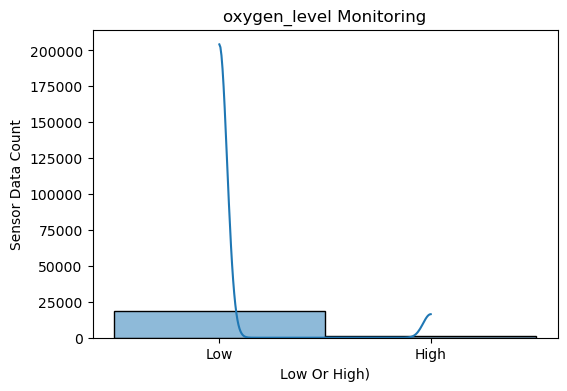

In [6]:
# Display distribution of Air Quality
print(df['oxygen_level'].value_counts())
plt.figure(figsize=(6, 4))
sns.histplot(df['oxygen_level'], bins=30, kde=True)
plt.title('oxygen_level Monitoring')
plt.xlabel('Low Or High)')
plt.ylabel('Sensor Data Count')
plt.show()


Correlation Matrix:
                  tds  turbidity        pH       mq4  temperature  humidity  \
tds          1.000000   0.001156  0.005561 -0.001540     0.001038  0.003864   
turbidity    0.001156   1.000000  0.008519  0.011458    -0.000669 -0.008665   
pH           0.005561   0.008519  1.000000  0.000984     0.002857  0.001103   
mq4         -0.001540   0.011458  0.000984  1.000000    -0.009921  0.008386   
temperature  0.001038  -0.000669  0.002857 -0.009921     1.000000  0.003117   
humidity     0.003864  -0.008665  0.001103  0.008386     0.003117  1.000000   
rain        -0.014457   0.003260  0.002419 -0.000061    -0.002112  0.009882   

                 rain  
tds         -0.014457  
turbidity    0.003260  
pH           0.002419  
mq4         -0.000061  
temperature -0.002112  
humidity     0.009882  
rain         1.000000  


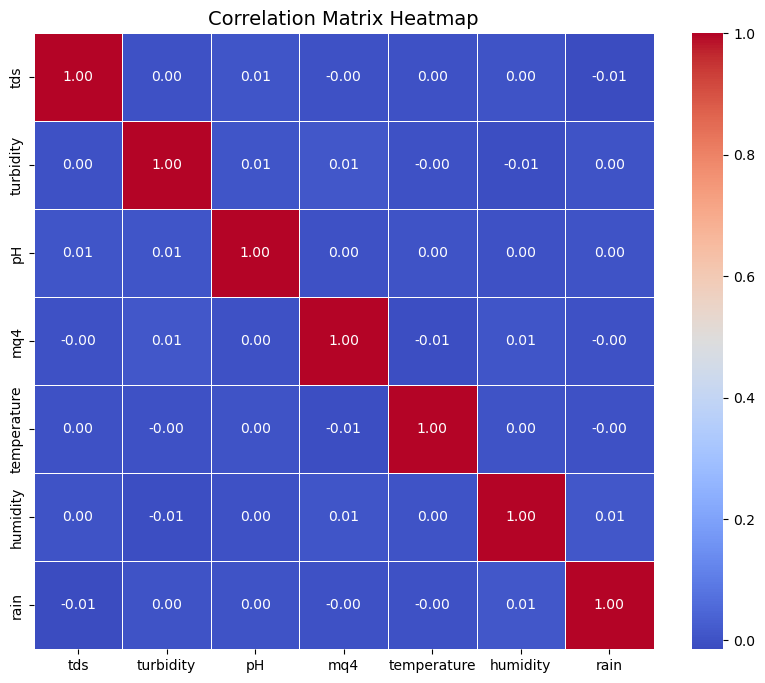

In [7]:
# Filter out non-numeric columns for correlation calculation
numeric_df = df.select_dtypes(include=['number'])

# Calculate and display the correlation matrix
print("\nCorrelation Matrix:")
correlation_matrix = numeric_df.corr()
print(correlation_matrix)

# Plotting the heatmap of the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix Heatmap', fontsize=14)
plt.show()


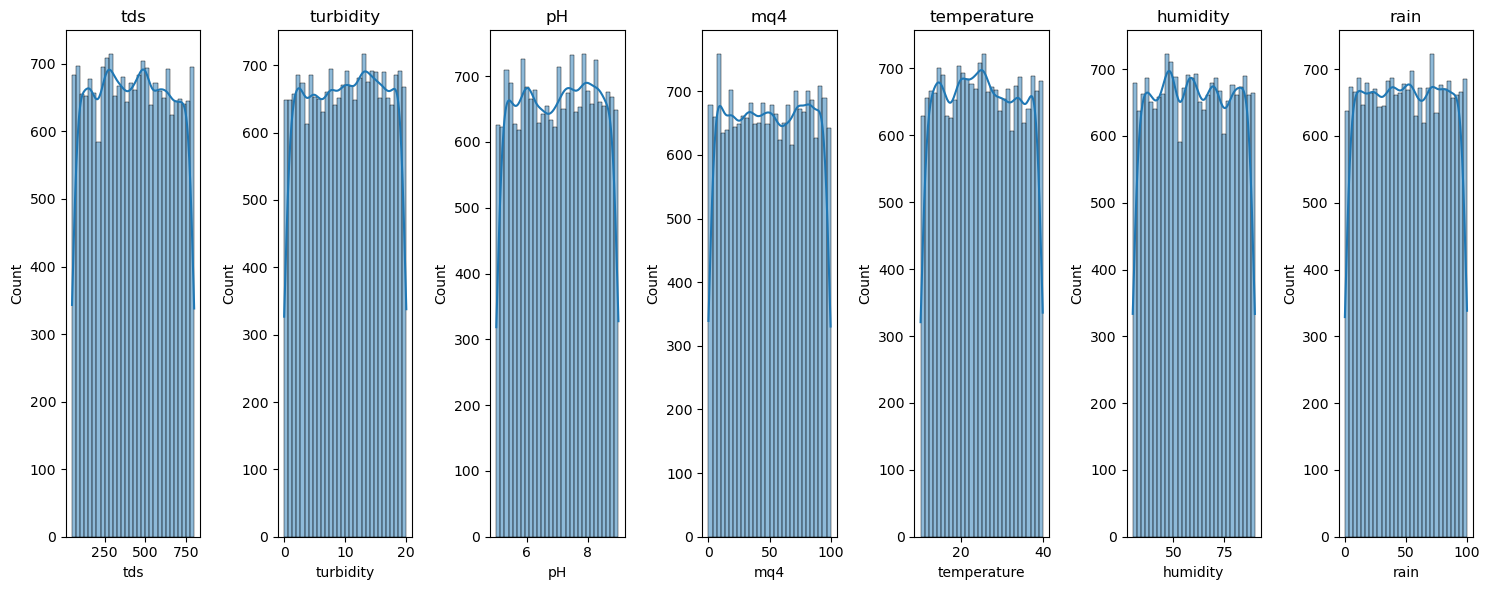

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

# Visualize distributions of individual features
plt.figure(figsize=(15, 6))

columns = ['tds', 'turbidity', 'pH', 'mq4', 'temperature', 'humidity', 'rain']

for i, column in enumerate(columns, start=1):
    plt.subplot(1, len(columns), i)  # Adjusting columns dynamically
    sns.histplot(df[column], bins=30, kde=True)
    plt.title(column)
    plt.xlabel(column)  # Labeling correctly based on feature name
    plt.ylabel('Count')

plt.tight_layout()
plt.show()


In [9]:
# Encode the target variable
label_encoder = LabelEncoder()
df['oxygen_level'] = label_encoder.fit_transform(df['oxygen_level'])


In [10]:
import joblib
joblib.dump(label_encoder, 'label_encoder.pkl')

['label_encoder.pkl']

In [11]:
# Split the data into features and target
X = df.drop(columns=['oxygen_level'])
y = df['oxygen_level']


In [12]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [13]:
# Scale the features
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [14]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Create and train the Random Forest model
rf_model = RandomForestClassifier(random_state=42, n_estimators=100)
rf_model.fit(X_train_scaled, y_train)

# Make predictions
y_pred_rf = rf_model.predict(X_test_scaled)

# Evaluate the model
rf_accuracy = accuracy_score(y_test, y_pred_rf) * 100  # Convert to percentage
print(f"Random Forest Accuracy: {rf_accuracy:.2f}%")
print(classification_report(y_test, y_pred_rf))


Random Forest Accuracy: 99.95%
              precision    recall  f1-score   support

           0       1.00      0.99      1.00       290
           1       1.00      1.00      1.00      3710

    accuracy                           1.00      4000
   macro avg       1.00      1.00      1.00      4000
weighted avg       1.00      1.00      1.00      4000



In [15]:
# Save the trained models and scaler
joblib.dump(rf_model, 'rf_model.pkl')
joblib.dump(scaler, 'scaler.pkl')


['scaler.pkl']

In [16]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report

# Create and train the Gradient Boosting model
gb_model = GradientBoostingClassifier(random_state=42, n_estimators=100, learning_rate=0.1)
gb_model.fit(X_train_scaled, y_train)

# Make predictions
y_pred_gb = gb_model.predict(X_test_scaled)

# Evaluate the model
gb_accuracy = accuracy_score(y_test, y_pred_gb) * 100  # Convert to percentage
print(f"Gradient Boosting Accuracy: {gb_accuracy:.2f}%")
print(classification_report(y_test, y_pred_gb))
joblib.dump(gb_model, 'gb_model.pkl')


Gradient Boosting Accuracy: 100.00%
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       290
           1       1.00      1.00      1.00      3710

    accuracy                           1.00      4000
   macro avg       1.00      1.00      1.00      4000
weighted avg       1.00      1.00      1.00      4000



['gb_model.pkl']

In [3]:
import pandas as pd
import joblib  # For loading .pkl files

# Load the trained Random Forest model, scaler, and label encoder
rf_model = joblib.load('gb_model.pkl')  # Replace with the correct path if needed
scaler = joblib.load('scaler.pkl')     # Replace with the correct path if needed
label_encoder = joblib.load('label_encoder.pkl')  # Replace with the correct path if needed

def disaster(tds, turbidity, pH, mq4, temperature, humidity, rain):

    # Create a DataFrame from the input values
    new_data = pd.DataFrame({
        'tds': [tds],
        'turbidity': [turbidity],
        'pH': [pH],
        'mq4': [mq4],
        'temperature': [temperature],
        'humidity': [humidity],
        'rain': [rain]
    })
    
    # Scale the new data using the loaded scaler
    new_data_scaled = scaler.transform(new_data)
    
    # Make predictions using the loaded Random Forest model
    dt_prediction = rf_model.predict(new_data_scaled)
    
    # Convert numerical prediction back to the original label
    result = label_encoder.inverse_transform(dt_prediction)
    
    return result[0]

# Main function to get input from the user and display the prediction
if __name__ == "__main__":
    print("Enter sensor values for prediction:")
    
    try:
        # Get user input
        tds = float(input("tds: "))
        turbidity = float(input("turbidity: "))
        pH = float(input("pH: "))
        mq4 = float(input("mq4: "))
        temperature = float(input("temperature: "))
        humidity = float(input("humidity: "))
        rain = float(input("rain: "))
        
        # Predict the disaster type
        predicted_result = disaster(tds, turbidity, pH, mq4, temperature, humidity, rain)
        
        # Display the prediction
        print("\nPredicted Result:", predicted_result)
    except Exception as e:
        print("\nError:", str(e))


Enter sensor values for prediction:


tds:  100
turbidity:  0
pH:  8
mq4:  49
temperature:  32
humidity:  71
rain:  0



Predicted Result: High
